In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20.0,10.0)

#  Reading File Data
data=pd.read_csv('OlympicAthletes.csv')
print(data.shape)
data.head()

(8618, 8)


,Athlete,Country,Year,Sport,Gold,Silver,Bronze,Total
0,Yang Yilin,China,2008,Gymnastics,1,0,2,3
1,Leisel Jones,Australia,2000,Swimming,0,2,0,2
2,Go Gi-Hyeon,South Korea,2002,Short-Track Speed Skating,1,1,0,2
3,Chen Ruolin,China,2008,Diving,2,0,0,2
4,Katie Ledecky,United States,2012,Swimming,1,0,0,1


In [28]:
#  Collecting X and Y
X=data['Year'][data['Country']=='United States'].values
Y=data['Gold'][data['Country']=='United States'].values

print(X,Y)


[2012 2012 2000 ... 2004 2008 2004] [1 1 0 ... 0 1 0]


In [29]:
mean_X=np.mean(X)
mean_Y=np.mean(Y)

count=len(X)
numretor=0
Denom=0
for i in range(count):
    numretor+= (X[i]-mean_X)*(Y[i]-mean_Y)
    Denom+= (X[i]-mean_X)**2

#  using y=mx+c
m=numretor / Denom
c=mean_Y-(m*mean_X)
print(m,c)

0.004127877596391991 -7.7830075155408505


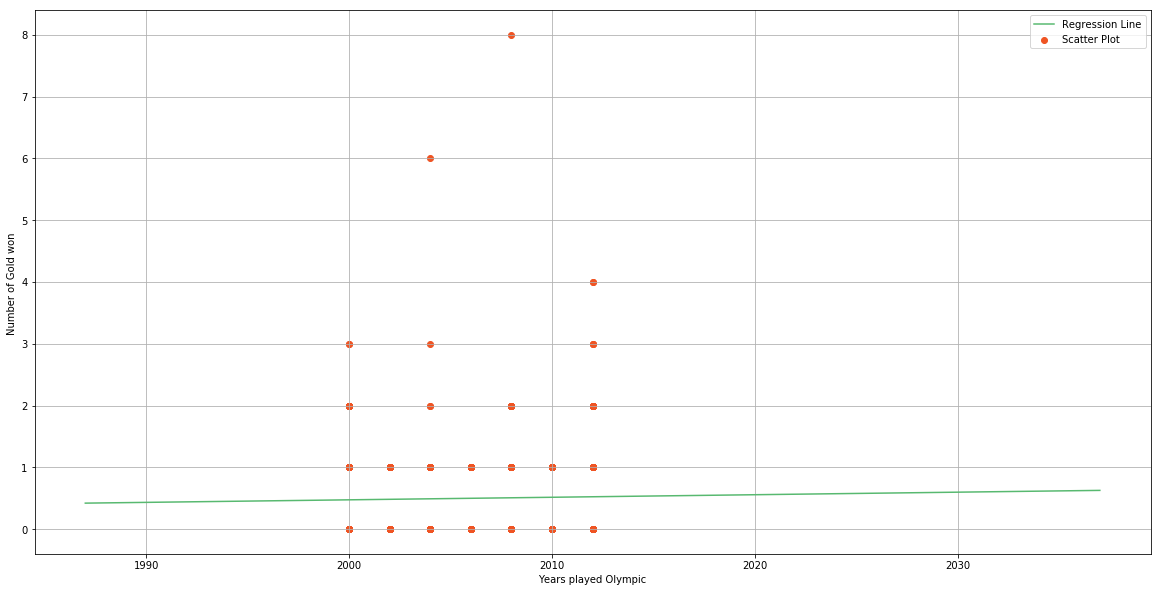

In [35]:
##  Plotting Values

max_x=np.max(X)+25
min_x=np.max(X)-25


# Calculating line values x and y
x=np.linspace(min_x,max_x,1000)
y=m*x+c

#  plotting line 
plt.plot(x,y,color='#58b970',label='Regression Line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.xlabel('Years played Olympic')
plt.ylabel('Number of Gold won ')
plt.grid(True)

plt.legend()
plt.show()

In [33]:
# Find R^2
# submetion of Yp-meanY**2 / submetion of y-menY **2

submetionN=0
submetionD=0
for i in range(count):
    y_pred= m*X[i]+c
    submetionN+= (y_pred-mean_Y)**2
    submetionD+= (Y[i]-mean_Y)**2
    
R2=submetionN / submetionD
R2

0.0007047637922187553

In [38]:
##  SCiKiT - Learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=X.reshape((m,1))
reg=LinearRegression()
reg=reg.fit(X,Y)

Y_pred=reg.predict(X)

r2_score=reg.score(X,Y)

r2_score

TypeError: 'numpy.float64' object cannot be interpreted as an integer